# 電気電子計算工学及演習第1 回演習課題

In [2]:
#library import

import numpy as np
import matplotlib.pyplot as plt


## 課題1.1
方程式 $4x^3-3x=0$の解$x={\sqrt{3}\over2}$を二分方とニュートン方で解く.

### 課題1.1.1
#### 二分法 <br>
二分法は$f(x)=0$となる会を求めるとき、下のループを繰り返すことにより解に近づく方法である.  
1.$f_1(x_1)$と$f((x_2)$となる符号が異なる区間の下限$x_1$と上限$x_2$を定める  
2.$x_1$と$x_2$の中間地$x_M$を求める  
3.$f(x_M)$の符号が$f(x_1)と同じであれば、$x_1$と、$f(x_2)$とおなじであれば$x2$と置き換える  

この課題では、初期区間を$0.3 < x < 0.9$, 初期近似解を $x_0 = 0.6$として100回ループする.

In [3]:
f = np.poly1d([4, 0, -3, 0]) # f=4x^3 - 3x
x1 = 0.3
x2 = 0.9

Xs = [] 
errors = []

for _ in range(100): #100回のループ
    X = (x1+x2)/2 
    error = f(X)
    Xs.append(X)
    errors.append(error)
    if error < 0:
        x1 = X
    else:
        x2 = X

縦軸を誤差の絶対値の対数、横軸を繰り返し回数としグラーフにプロットする．

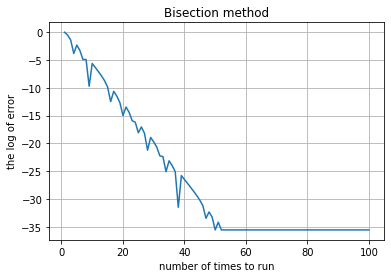

In [4]:
ln_errors = np.log(abs(np.array(errors)))
plt.plot(np.arange(1, 101), ln_errors)
plt.title('Bisection method')
plt.xlabel('number of times to run')
plt.ylabel('the log of error')
plt.grid()
plt.show()


3回から誤差がかなり減っていることが分かり、50回からほぼ就職していることが分かる．


### 課題1.1.2
#### ニュートン法 <br>
ニュートン法は$f(x)=0$の解を求めるとき、次の漸化式によって、解に収束する数列を得ることが多い.  
$x_{n+1} = x_n - {f(x_n)\over f'(x_n)}$
この課題では初期値0.6から買いを求めていく。

In [5]:
fd = f.deriv() #f'を求める
X = 0.6

Xs = []
errors = []


for _ in range(100):
    X = X - f(X)/fd(X)
    error = f(X)
    Xs.append(X)
    errors.append(error)

縦軸を誤差の絶対値の対数、横軸を繰り返し回数としグラーフにプロットする．

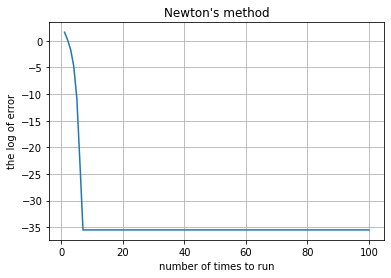

In [6]:
ln_errors = np.log(abs(np.array(errors)))
plt.plot(np.arange(1, 101), ln_errors)
plt.title('Newton\'s method')
plt.xlabel('number of times to run')
plt.ylabel('the log of error')
plt.grid()
plt.show()


繰り返し回数7回からほぼ収束していることが分かる．

## 課題1.3  

バッタGは与えられた表が示す確率で1秒ごとに移動する．  
時刻tにおいて，地点0-6のそれぞれの位置にバッタがいる確率を$\pmb{g}^{(t)}=(g_0^{(t)}, g_1^{(t)}, \cdots, g_6^{(t)})$  
と要素数7 のベクトルで表す. この場合時刻t + 1 におけるバッタの存在確率は,  s を
その場にとどまる確率, p, q をそれぞれ左隣 右隣に移動する確率とすると($s + p + q = 1$ を満たす)

$\pmb{g}^{(t+1)} = \pmb{S}\pmb{g}^{(t)}$, $\pmb{S} =$ 
$\begin{pmatrix} s + p & p & 0 & 0 & 0 & 0 & 0 \\
                   0   & s & p & 0 & 0 & 0 & 0 \\
                   0   & 0 & s & p & 0 & 0 & 0 \\
                   0   & s & 0 & s & p & 0 & 0 \\
                   0   & 0 & 0 & 0 & s & p & 0 \\
                   0   & 0 & 0 & 0 & 0 & s & p \\
                   0   & 0 & 0 & 0 & 0 & q & s + q \\
                   \end{pmatrix}$  
である.上の漸化式を逐次的に適用することで，バッグの存在確率の時間発展を知ることができる.  

### 課題1.3.1

$\pmb{g}^{(t)} = (1, 0, 0, 0, 0, 0, 0)^T, s = 0.03, p=q=0.485$とするる．時刻0-60秒における、バックの存在確率は

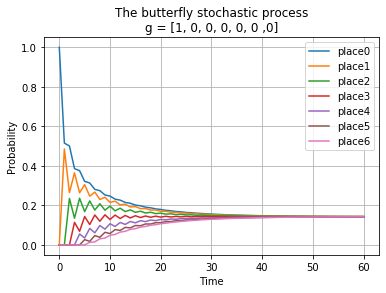

In [7]:
#バッタの存在確率をプロットする関数
def get_butterfly(t, g1):
    g = g1
    data = [g]
    s=0.03
    p=0.485
    q=0.485
    
    S = np.array([[s+p, p, 0, 0, 0, 0, 0],
              [q,   s, p, 0, 0, 0, 0],
              [0,   q, s, p, 0, 0, 0],
              [0,   0, q, s, p, 0, 0],
              [0,   0, 0, q, s, p, 0],
              [0,   0, 0, 0, q, s, p],
              [0,   0, 0, 0, 0, q, s+q]]) 
    
    for _ in range(t):
        g = np.dot(S, g)
        data.append(g)
    data = zip(*data)
    
    for i, g in enumerate(data):
        plt.plot(range(t+1), g, label="place{}".format(i))
    
    plt.title("The butterfly stochastic process\n"
              "g = [{}, {}, {}, {}, {}, {} ,{}]".format(*g1))
    plt.legend(loc="upper right")
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.grid()
    plt.show()

g = [1, 0, 0, 0, 0, 0, 0]
get_butterfly(60, g)

### 課題1.3.2
以下の様々な$\pmb{g}^{(0)}$に対して、バッタの存在確率の時間変化を調べる.  
1. $\pmb{g}^{(0)}=(0,\ 0,\ 0,\ 1,\ 0,\ 0,\ 0)$  
2. $\pmb{g}^{(0)}=(0.5,\ 0,\ 0,\ 0,\ 0,\ 0,\ 0.5)$
3. $\pmb{g}^{(0)}=(0.15,\ 0.14,\ 0.14,\ 0.14,\ 0.14,\ 0.14,\ 0.15)$



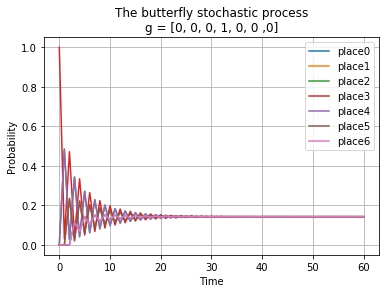

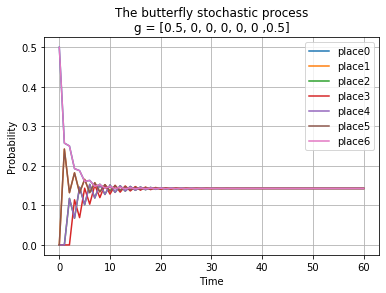

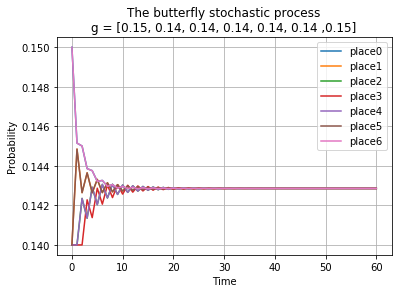

In [8]:
#init g_0
g1 = [0, 0, 0, 1, 0, 0, 0]
g2 = [0.5, 0, 0, 0, 0, 0, 0.5]
g3 = [0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.15]
get_butterfly(60, g1)
get_butterfly(60, g2)
get_butterfly(60, g3)

3つのグラフを見ると収束するところは全部約1.43で同じであることが分かる。

### 課題1.3.3
上の式から、以下の式を求めることができる.  
$\pmb{g}^{(t)}=\pmb{S}^t\pmb{g}^{(0)}$
この式から、十分大きな$t$に対して$\pmb{S}^t$を求める。  

In [9]:

s=0.03
p=0.485
q=0.485

S = np.array([[s+p, p, 0, 0, 0, 0, 0],
          [q,   s, p, 0, 0, 0, 0],
          [0,   q, s, p, 0, 0, 0],
          [0,   0, q, s, p, 0, 0],
          [0,   0, 0, q, s, p, 0],
          [0,   0, 0, 0, q, s, p],
          [0,   0, 0, 0, 0, q, s+q]]) 


def get_st(t, S): 
    S1 = S
    for _ in range(t):
        S1 = np.dot(S1, S)
    print("t = {}\n".format(t), S1, "\n")
        
get_st(50, S) 
get_st(100, S)
get_st(200, S)
get_st(1000, S)

t = 50
 [[0.14442863 0.14412627 0.14354762 0.14286824 0.14214667 0.14160185
  0.14128072]
 [0.14412627 0.14384997 0.14344689 0.14282605 0.14232342 0.14182554
  0.14160185]
 [0.14354762 0.14344689 0.1431284  0.14290207 0.14250492 0.14232342
  0.14214667]
 [0.14286824 0.14282605 0.14290207 0.14280728 0.14290207 0.14282605
  0.14286824]
 [0.14214667 0.14232342 0.14250492 0.14290207 0.1431284  0.14344689
  0.14354762]
 [0.14160185 0.14182554 0.14232342 0.14282605 0.14344689 0.14384997
  0.14412627]
 [0.14128072 0.14160185 0.14214667 0.14286824 0.14354762 0.14412627
  0.14442863]] 

t = 100
 [[0.14286723 0.14286524 0.14286163 0.14285715 0.14285265 0.14284905
  0.14284705]
 [0.14286524 0.14286363 0.14286075 0.14285714 0.14285355 0.14285065
  0.14284905]
 [0.14286163 0.14286075 0.14285913 0.14285715 0.14285514 0.14285355
  0.14285265]
 [0.14285715 0.14285714 0.14285715 0.14285713 0.14285715 0.14285714
  0.14285715]
 [0.14285265 0.14285355 0.14285514 0.14285715 0.14285913 0.14286075
  0.142861

t = 200のときと　t = 1000のとき、値がほぼ同じであることから,   
$\pmb{S}^{(t)}$が十分大きいなtに対して，収束していることが分かる．  
また、$\pmb{S}^{(t)}$が収束していることから、課題1.3.2のでの$\pmb{g}^{(0)}$が収束していることが説明できる。






## 課題1.4

### 課題1.4.1

以下のようなs, p, q値においてバッタの時間発展を調べる。(但し, $\pmb{g}^{(0)}=(1, 0, 0, 0, 0, 0, 0)$とする。)
1. $s = 0.3, p = 0.35, q = 0.35$
2. $s = 0.5, p = 0.25, q = 0.25$
3. $s = 0.9, p = 0.05, q = 0.05$
4. $s = 0.1, p = 0.7, q = 0.2$


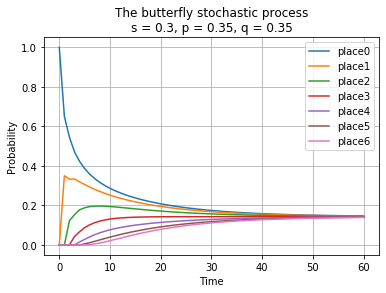

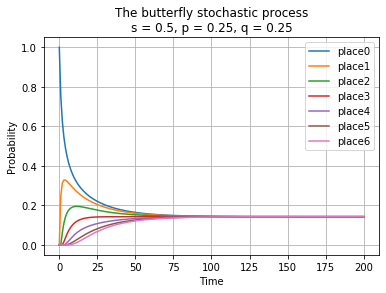

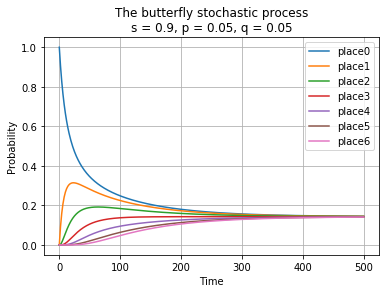

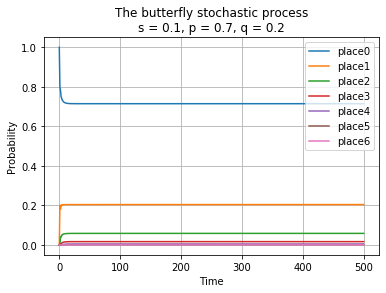

In [10]:
def get_butterfly(t, s, p, q):
    g = np.array([1, 0, 0, 0, 0, 0, 0])
    data = [g]

    S = np.array([[s+p, p, 0, 0, 0, 0, 0],
              [q,   s, p, 0, 0, 0, 0],
              [0,   q, s, p, 0, 0, 0],
              [0,   0, q, s, p, 0, 0],
              [0,   0, 0, q, s, p, 0],
              [0,   0, 0, 0, q, s, p],
              [0,   0, 0, 0, 0, q, s+q]]) 
    
    for _ in range(t):
        g = np.dot(S, g)
        data.append(g)
    data = zip(*data)
    
    for i, g in enumerate(data):
        plt.plot(range(t+1), g, label="place{}".format(i))
    
    plt.title("The butterfly stochastic process\n"
              "s = {}, p = {}, q = {}".format(s, p, q))
    plt.legend(loc="upper right")
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.grid()
    plt.show()

get_butterfly(60, 0.3, 0.35, 0.35)
get_butterfly(200, 0.5, 0.25, 0.25)
get_butterfly(500, 0.9, 0.05, 0.05)
get_butterfly(500, 0.1, 0.7 , 0.2 )

上のグラフから収束するところが(s, p, q)の値によって決まることが分かる。

## 課題1.4.2
$\pmb{S}$の固有値が収束することろとにどのような影響を与えるかを調べよう。  
課題1.3.1, 1.3.2の$\pmb{S}$に対して固有値をと固有関数を求める。

In [11]:
import numpy.linalg as lin #固有値と固有ベクトルに関するライブラリ

s=0.03
p=0.485
q=0.485

S = np.array([[s+p, p, 0, 0, 0, 0, 0],
          [q,   s, p, 0, 0, 0, 0],
          [0,   q, s, p, 0, 0, 0],
          [0,   0, q, s, p, 0, 0],
          [0,   0, 0, q, s, p, 0],
          [0,   0, 0, 0, q, s, p],
          [0,   0, 0, 0, 0, q, s+q]])

W, eV = lin.eig(S)
eV = eV.swapaxes(0, 1)

for i, v in enumerate(eV):
    print("eigenValue: {}\neigenVector\n{}".format(W[i], v))

eigenValue: -0.8439398018653481
eigenVector
[ 0.11894244 -0.33326932  0.48158812 -0.53452248  0.48158812 -0.33326932
  0.11894244]
eigenValue: -0.5747851078029717
eigenVector
[ 2.31920614e-01 -5.21120889e-01  4.17906506e-01  9.44132562e-16
 -4.17906506e-01  5.21120889e-01 -2.31920614e-01]
eigenValue: -0.18584530593762494
eigenVector
[-0.33326932  0.48158812  0.11894244 -0.53452248  0.11894244  0.48158812
 -0.33326932]
eigenValue: 0.2458453059376249
eigenVector
[ 4.17906506e-01 -2.31920614e-01 -5.21120889e-01 -3.43321997e-17
  5.21120889e-01  2.31920614e-01 -4.17906506e-01]
eigenValue: 0.6347851078029716
eigenVector
[ 0.48158812  0.11894244 -0.33326932 -0.53452248 -0.33326932  0.11894244
  0.48158812]
eigenValue: 1.0000000000000002
eigenVector
[0.37796447 0.37796447 0.37796447 0.37796447 0.37796447 0.37796447
 0.37796447]
eigenValue: 0.9039398018653466
eigenVector
[-5.21120889e-01 -4.17906506e-01 -2.31920614e-01  3.08931024e-16
  2.31920614e-01  4.17906506e-01  5.21120889e-01]


べき乗法によると、線形変換行列$\pmb{A}$において、適切な初期ベクトル$\pmb{x}^{(0)}$にから始め,  
逐次的に$\pmb{x}^{(k)} = \pmb{A}\pmb{x}^{(k-1)}$とすると,  
$\pmb{x}^{(k)}$が$\pmb{A}$の絶対値最大固有値$\lambda1$に属する固有ベクトルの方向に漸近していくことが知られている.  
このことを用いて、行列$\pmb{S}$の絶対値最大固有値(1)に属する固有ベクトルを時間発展のグラフにプロットすると

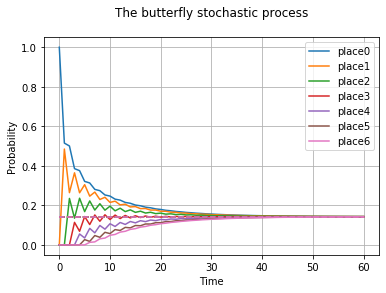

In [12]:
t = 60
g = np.array([1, 0, 0, 0, 0 ,0 ,0])
data = [g]

for _ in range(t):
    g = np.dot(S, g)
    data.append(g)

data = list(zip(*data))
V = eV[5] #固有値1に属する固有ベクトル
V = V * (data[0][60]/V[0]) #値合わせ


for i, g in enumerate(data):
    line, = plt.plot(range(t+1), g, label="place{}".format(i))
    plt.plot(range(t+1), np.ones(t+1)*V[i], c=line.get_c(), ls="--")

plt.title("The butterfly stochastic process\n")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.grid()
plt.show()

$\pmb{g}_0$が絶対最大値固有値に属する固有ベクトル方向に近いづいていくことが分かる．  
ほかの$\pmb{S}(s = 0.1, p = 0.7, q = 0.2)$の場合についても調べると  
同じく一致していることが分かる。

In [13]:
s=0.1
p=0.7
q=0.2

S = np.array([[s+p, p, 0, 0, 0, 0, 0],
          [q,   s, p, 0, 0, 0, 0],
          [0,   q, s, p, 0, 0, 0],
          [0,   0, q, s, p, 0, 0],
          [0,   0, 0, q, s, p, 0],
          [0,   0, 0, 0, q, s, p],
          [0,   0, 0, 0, 0, q, s+q]])

W, eV = lin.eig(S)
eV = eV.swapaxes(0, 1)

for i, v in enumerate(eV):
    print("eigenValue: {}\neigenVector\n{}".format(W[i], v))

eigenValue: -0.574223363968088
eigenVector
[ 0.33942609 -0.66635323  0.54483671 -0.33438713  0.16640611 -0.06473923
  0.01481068]
eigenValue: -0.36657704454059065
eigenVector
[ 0.47028559 -0.78374911  0.38803175 -0.03470984 -0.08773077  0.06839304
 -0.02052067]
eigenValue: 0.9999999999999993
eigenVector
[-9.58314859e-01 -2.73804245e-01 -7.82297844e-02 -2.23513670e-02
 -6.38610485e-03 -1.82460139e-03 -5.21314682e-04]
eigenValue: -0.06651941924989614
eigenVector
[ 0.61178669 -0.7573215   0.00535914  0.21510271 -0.05270087 -0.04892118
  0.026695  ]
eigenValue: 0.2665194192498962
eigenVector
[ 0.73771753 -0.56222568 -0.34452143  0.07867947  0.11715135  0.00538869
 -0.03218993]
eigenValue: 0.7742233639680882
eigenVector
[ 0.89627007 -0.03300404 -0.28786587 -0.26783584 -0.17572572 -0.09273031
 -0.03910829]
eigenValue: 0.5665770445405902
eigenVector
[ 0.8350698  -0.27846352 -0.42419806 -0.20318339 -0.01423014  0.04856746
  0.03643784]


0.7155319174128953 0.7143967603529986
0.20362331016507562 0.20411336010085657
0.05794572508080305 0.05831810288595892
0.016489848481448882 0.016662315110274262
0.004692823900942216 0.004760661460078234
0.0013358201895795657 0.0013601889885938654
0.00038055476925043274 0.0003886254253125259


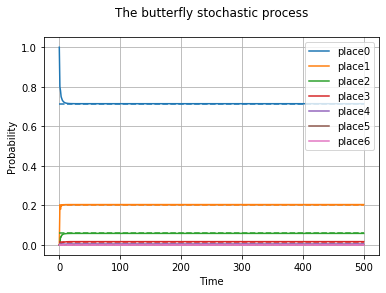

In [20]:
t = 500
g = np.array([1, 0, 0, 0, 0 ,0 ,0])
data = [g]

for _ in range(t):
    g = np.dot(S, g)
    data.append(g)

data = list(zip(*data))
V = eV[2] #絶対最大値固有値に属する固有ベクトル
V = V * (data[0][60]/V[0]) #値合わせ

for i, g in enumerate(data):
    line, = plt.plot(range(t+1), g, label="place{}".format(i))
    plt.plot(range(t+1), np.ones(t+1)*V[i], c=line.get_c(), ls="--")

plt.title("The butterfly stochastic process\n")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.grid()
plt.show()